Video link:-
- https://www.scaler.com/meetings/i/dsml-advanced-naive-bayes-2/archive

PreREad
- bernoulli randomn variable
- pdf, cdf (for NB on non text data)
- How to check if Gaussian? Tests

Missing topic:
- Laplace smoothing in multinomial NB (specifically, what happens to calue of C?)

# Train and Test time in Naive Bayes

### Q. We understood the math behind Naive Bayes, but what exactly happens during training and testing?
#### Training

- Understanding the dataset
 - We mould our dataset in such a way that we have all the **texts (emails) along the rows**, and **all the possible words across all emails in the columns**.

 - So essentially if we consider text i, the cells of that row are binary (0 or 1) indicating the presence or absence of a word j in that text.

 - And there is at last, a column containing the labels **y**.

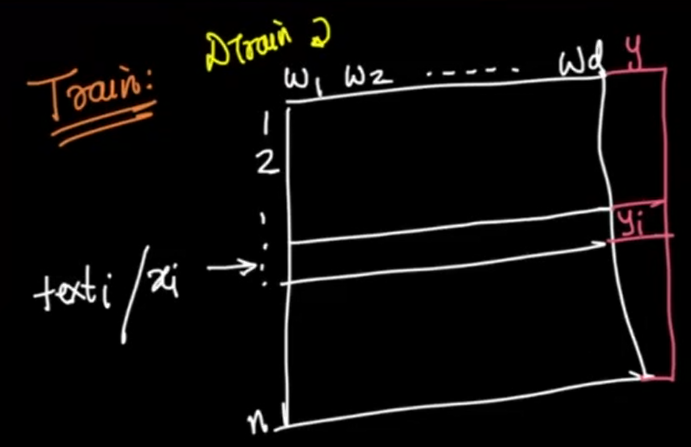

- Calculating **class priors**
 - Recall the way we calculated class priors.

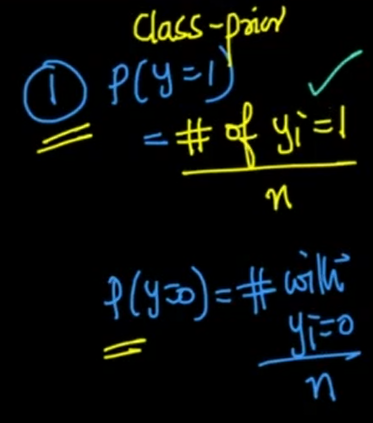

- Calculating the **likelihood** of **all words** (from 1 to d) for **both classes** (y=0 and y=1)
 - These values are calculated using the **conditional probability** concept that you must've read about in the **pre-read**.
 - Thus, the formula to calculate the probability of occurence of word w<sub>j</sub> in a text with class = 1 (i.e. spam) becomes $P(w_{j}|y_{i}=1) = P(w_{j} \wedge y_{i}=1)/P(y_{i}=1) $
 - Similarily, the formula to calculate the probability of occurence of word w<sub>j</sub> in a text with class = 0 (i.e. not spam) becomes $P(w_{j}|y_{i}=0) = P(w_{j} \wedge y_{i}=0)/P(y_{i}=0) $
 - Since there are d words, we get d such likelihood values for class 1, and d different values for class 0.

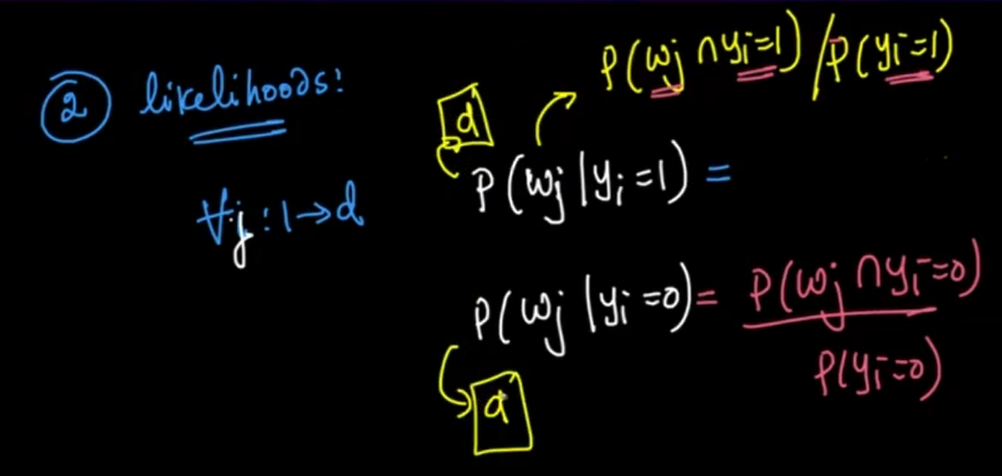

#### Testing
- Suppose our text i consists of the following words $text_{i} = w_{1}, w_{3}, w_{6}, w_{12}, w_{15}$
- We have already calculated the class priors and the likelihoods of all words, for both classes. Using the same, we just calculate the value of $P(y=1|w_{1}, w_{3}, w_{6}, w_{12}, w_{15})$ and $P(y=0|w_{1}, w_{3}, w_{6}, w_{12}, w_{15})$

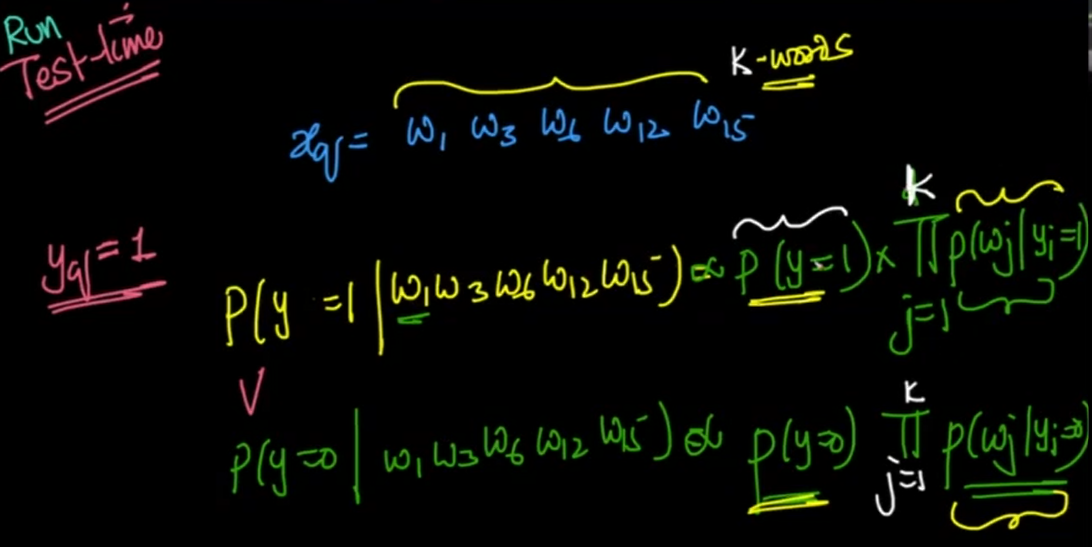

- Here in this example, we have k=5 words in the text, therefore j iterates from 1 to 5 in the $\pi$.
 - So, the values on expanding become,
 $P(y=0|w_{1}, w_{3}, w_{6}, w_{12}, w_{15}) \ \alpha \ P(y=0)*P(w_{1}|y_{i}=0)*P(w_{3}|y_{i}=0)*P(w_{6}|y_{i}=0)*P(w_{12}|y_{i}=0)*P(w_{15}|y_{i}=0)$
 - Similarily, we can get value for $P(y=0|w_{1}, w_{3}, w_{6}, w_{12}, w_{15})$
 - Proportionality sign is being used because, remember that we are ignoring the denominator value, since our goal is to compare the two values.
- Out of the two values, whichever probability is higher, we report that class as the final answer!
 - i.e. if $P(y=1|w_{1}, w_{3}, w_{6}, w_{12}, w_{15})$ > $P(y=0|w_{1}, w_{3}, w_{6}, w_{12}, w_{15})$, we report our prediction as SPAM (class y=1).

---
# Complexity of Naive Bayes


---
### Q. Based on everything we have studied so far, What do you think is the space complexity of Naive Bayes at runtime? [Let them answer]
- So, if you recall what we've studied, during training, we only need to store the values of **class priors** and the **likelihood** values for both classes.
- For class priors, we only have two values that need to be stored, P(y=0) and P(y=1)
- For likelihood, we get d values for class 0, and d values for class 1. Where d is the number of unique words that exist across all texts.
 - This means, we store d + d = 2d values for likelihood

 This means, in total we store 2+2d values, so the space complexity becomes
 O(2d+2) = **O(d)**

### Q. What is the runtime complexity? [Let them answer]
- Suppose the text we are testing on, contains k words.
- So, in order to compute the $P(y=1|w_{1}, w_{2}, ..., w_{k})$ and $P(y=0|w_{1}, w_{2}, ..., w_{k})$ values, we need to lookup the aready calculated class prior values and the likelihood values for these k words.
 - Therefore, 2 lookups for the class prior values.
 - k lookups for $P(y=1|w_{1}, w_{2}, ..., w_{k})$
 - k lookups for $P(y=0|w_{1}, w_{2}, ..., w_{k})$

- Therefore total 2k+2 lookups,
This means, O(2k+2) = **O(k)**

---
### Recall that we discussed potential problems with our mathematical intuition.Let's see one of those problems.


# Laplace Smoothing (@25:00 in video)



### Q. What happens if during testing, we encounter a new word that never occured during training?
Let's formalize this problem.

- Suppose during our testing, we come across a text such that it contains a new word $ w' $along with other words.
- This means that the word $w'$ does not belong to the set of all words we have right now.

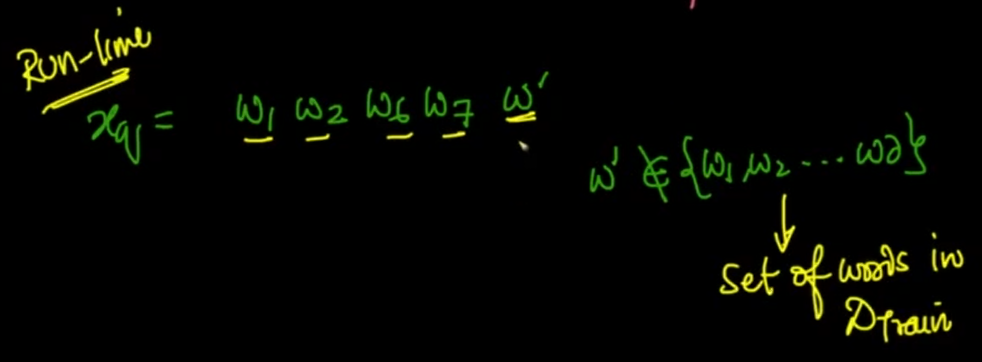

- So as per the general workflow, we have to calculate $P(y=1|w_{1}, w_{2}, w_{6}, w_{7}, w') = P(y=1)*P(w_{1}|y=1)*...*P(w'|y=1) $ and similarily for class 0.
- Let's focus on the last term in the above expression $P(w'|y=1)$,
 - This would be equal to zero (0), since it has never occured before during our training, so the probability of occurence of word $w'$ would be 0
 - Similarily, $P(y=0|w_{1}, w_{2}, w_{6}, w_{7}, w') = P(y=0)*P(w_{1}|y=0)*...*P(w'|y=0) $ would also be 0.
 - Since both are 0, how do we make our prediction?

- If you think about it, this is a very fundamental problem since any language like English has so so many words, it is highly improbable to cover all of them within our training set.  So this situation is bound to occur in real life!

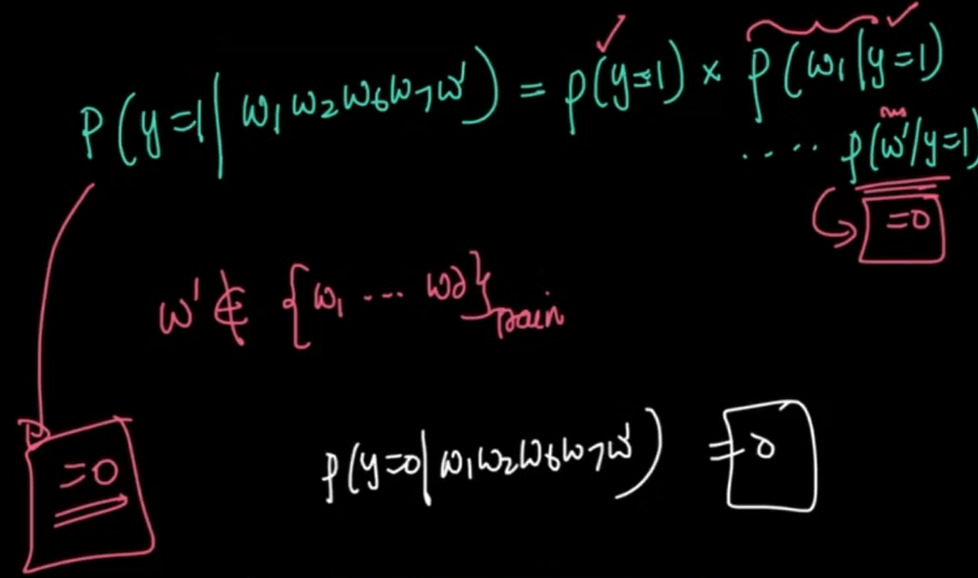

- Recall that we calculated the probability of occurence of word w<sub>j</sub> in class 1 as $P(w_{j}|y=1) = \frac{n_{j1}}{n_{1}}$ where n<sub>j1</sub> is the number of times word w<sub>j</sub> occured in class 1, and n<sub>1</sub> is the total number of entries with class = 1.
 - Therefore, when we try to calculate this for a new word $w'$, we get $n'_{1}$ as 0, as it never occured before in the training data, giving us the total probability as 0.

- This is not good, since it would make our Naive Baye's model **fail**!

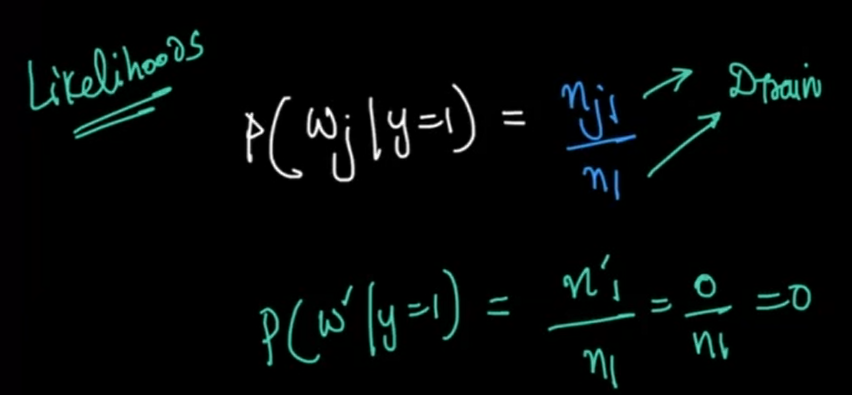

### Q. How can we prevent this value from getting converted to 0?
- **What if we ignore the new words we find?**
 - We can do this, if we just assign the value of $P(w'|y=1)$ and $P(w'|y=0)$ as 1.
 - This way, as this becomes 1, we can say that it's value did not bother the main product.
 - Though this approach can work fine, we look at another approach as it works better.

- **What if we add some value to the numerator and the denominator of $P(w'|y=1)$ and $P(w'|y=0)$?**
 - This way, we will not get 0 as result.
 - This is done as follows:-

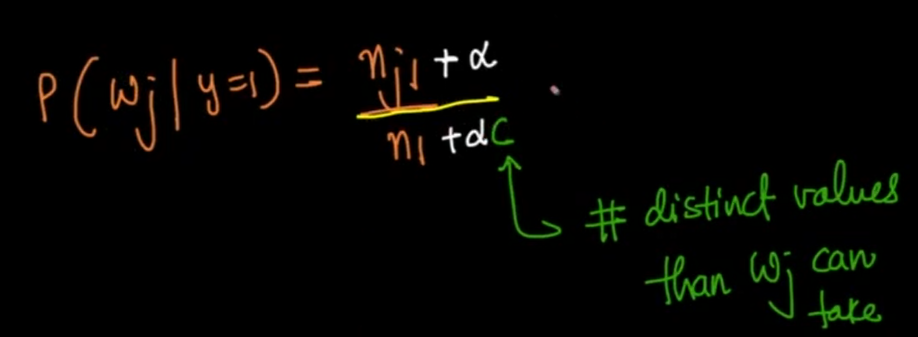

Here, $\alpha$ -> constant <br>
   C -> Number of distinct values that the word w<sub>j</sub> can take.


This technique is called as **Laplace smoothing** or **Additive Smoothing**.

- Essentially, it just means that we add some constant  $\alpha$ to the numerator and  $\alpha C$ to the denominator.

- In our case, we are taking word w<sub>j</sub> to be a **Bernoulli random variable**
 - Therefore generally, we take value of **C=2**, because there are **two** possibilities, either the word exists or it doesn't exist (i.e. either the value of $w'$ would be **0 or 1**).
 - Although, we will see more cases also.

### Q. How are we okay adding values to the numerator and denominator? Isn't that wrong?

- This **does not break the math** we worked out for Naive Bayes
- **Solves** the multiplication with 0 problem
- Probability we get is **very small**. Look at the example below to explain.
 - Let value of $\alpha = 1$ and $C=2$
 - As you can see, the value we do get after Laplace smoothing is very small.

- This is a mathematical hack that makes things work eventually, as we will see.

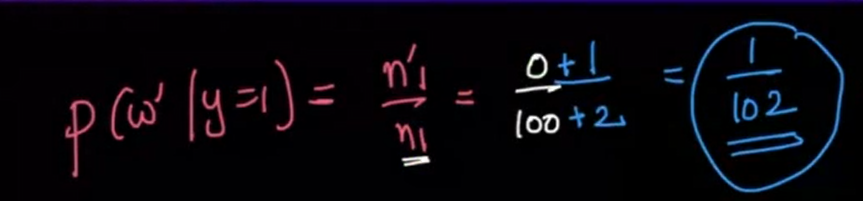

### Note:-
 - Whenever we perform Naive Bayes with Laplace smoothing.
  - We don't do Laplace smoothing for just the new words that are missing from the training set.
  - We tend to do the smoothing for **all the words** i.e. for the computation of all likelihoods whether the word is present or not.
  - $P(w_{j}|y=1) = \frac{n_{j1}+\alpha}{n_{1}+2\alpha}$ where C=2 (as explained before)
  - This is done at both **training time** and **testing time**.


### Q. Why do we take the value of C=2?
- As we discussed earlier, we defined C as the "Number of distinct values that the word wj can take".
 - w<sub>j</sub> is a Bernoulli random variable.
 - There are **two** possibilities, either the word exists or it doesn't exist (i.e. either the value of $w'$ would be **0 or 1**).
 - Hence we take value of **C=2**

- Imagine a case where in our training data, we have **no data belonging to class 1**
 - In reality, this should never happen, but lets explore the possibility for theoretical purposes.
 - This means that $n_{1}=0$ and thereby by extension, $n_{j1}=0$ also
 - This Implies, $P(w_{j}|y=1)=\frac{0+\alpha}{0+\alpha C} = \frac{1}{2}$ (consider C=2)
 - This means that $P(w_{j}|y=1)$ i.e. the probability that we observe word w<sub>j</sub> given the class label is 1 is 0.5
 - This makes logical sense, because we have not seen **any words occuring in class 1** as of yet, and we have not seen **any occurence of the word w<sub>j</sub>**.
 - So naturally this probability should be 0.5, because both, the presence or the absence of this word in class 1 is **equally probable** since we have **no data**.

# Hyper parameter alpha

### Q. Why is Laplace Smoothing better than just ignoring the probability of the new words we find? [Timestamp @37:42]
To answer this question, let's first consider a bunch of cases.

Consider the situation that we are **testing** the texts, and we come across a word $w'$ that never occured before in training. So, let $n_1 = 100$ i.e. the number of texts in class 1.
- **Case 1:-**
Let $\alpha = 1$ <br>
Then, $P(w'|y=1) = \frac{n'_1 + \alpha}{n_1 + 2\alpha} = \frac{0+1}{100+2} = \frac{1}{102}$ <br>
Notice that this value is very small

- **Case 2:-** Lets make $\alpha$ very large, our $n_1$ is same i.e.
Let $\alpha = 10,000$ <br>
Then, $P(w'|y=1) = \frac{n'_1 + \alpha}{n_1 + 2\alpha} = \frac{0+10000}{100+20000} \approx  \frac{1}{2}$ <br>
Notice that **as $\alpha$ is increasing**, and since $n_1$ is very small in comparison, i.e. $\alpha >> n_1$, this is completely **dominating** the probability, and we are getting a value **very close to 0.5**.

We will explore why changing $\alpha$ is making such changes.

These were cases where $n'_1$ was 0 because the words had never occured before.

---

Let us consider a few cases of the **training time**. So, we are computing the **likelihoods** for a word $w_j$. Let $n_{j1}=10$ and $n_{1}=100$ <br>
[Sanity check: $n_{j1}$ -> No. of times word $w_j$ occured in class 1 <br>
$n_{1}$ -> Total no. of occurences in class 1]

- **Case 1:-**
Let $\alpha = 1$<br>
Then, $P(w_j|y=1) = \frac{n_{j1} + \alpha}{n_1 + 2\alpha} = \frac{10+1}{100+2} = \frac{11}{102} \approx 0.1$  <br>
Okay, and what if we did not perform Laplace smoothing, then, $P(w_j|y=1) = \frac{n_{j1}}{n_1} = \frac{10}{100} = 0.1$  <br>
Notice that this value is **approximately the same** as when we do perform Laplace smoothing.

- **Case 2:-** Lets make $\alpha$ very large, our $n_1$ is same i.e.
Let $\alpha = 10,000$ <br>
Then, $P(w_j|y=1) = \frac{n_{j1} + \alpha}{n_1 + 2\alpha} = \frac{10+10000}{100+20000} \approx  \frac{1}{2}$ <br>
Notice that **as $\alpha$ is increasing**, and since $n_1$ is very small in comparison, i.e. $\alpha >> n_1$, even though the original ratio is 10/100, this is completely **dominating** the probability, and we are getting a value **very close to 0.5**.

---

So using the study of these cases we can say that on using Laplace smoothing,
- During **test time**, we are able to get rid of the **multiplication by 0 issue**.
- **at our training time, the probabilities are not changing much.**

But we also encountered an issue!

- As the value of $\alpha$ increases, **all the likelihoods will tend to become close to 0.5** (in this setting, because C=2).
- This means that both $P(y=1|w_1, w_2, ..., w_d)$ and $P(y=0|w_1, w_2, ..., w_d)$ would become dependant on just the **class prior values**, since the **product of likelihoods in both would fetch a very close result** (since they're all approx 0.5)
- So, consider a case where our class prior values are $P(y=1)=0.7$ and $P(y=0)=0.3$
 - This means that $P(y=1|w_1, w_2, ..., w_d)\approx 0.7$ and $P(y=0|w_1, w_2, ..., w_d \approx 0.3$, because the product of likelihoods, would **roughly cancel each other out**.

- As a result, the Naive Bayes would just return **class 1** (i.e. spam) for all texts! This is not good.

To summarize, We can say that if $\alpha$ value is too large, it begins **underfitting** the data.

This is same as K=n in KNN Algorithm.

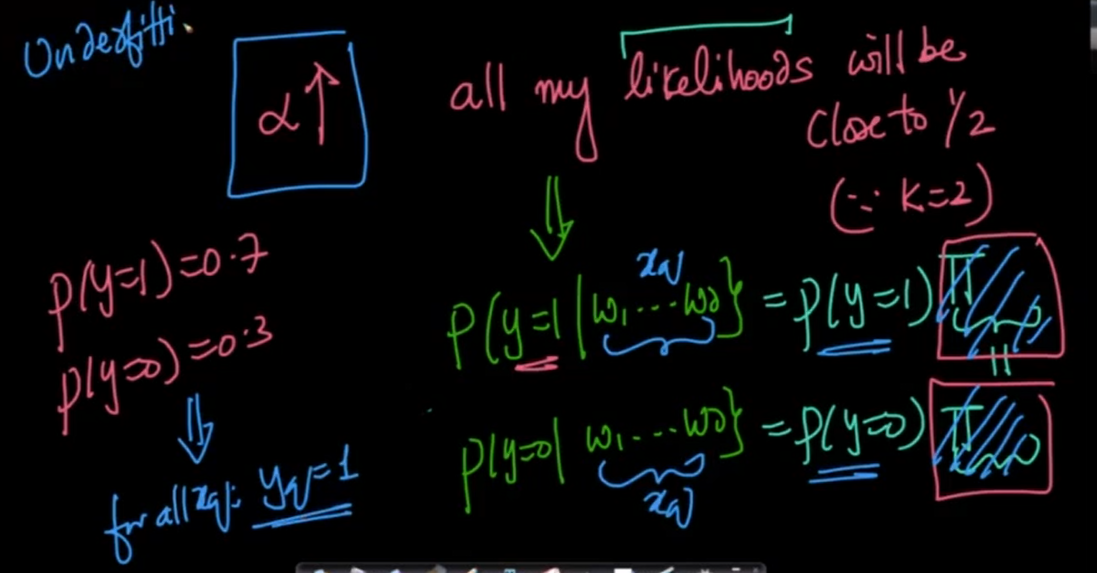

Conversely, if $\alpha$ decreases, the likelihoods become closer and closer to $\frac{n_{j1}}{n_1}$ or $\frac{n_{j0}}{n_0}$ respecitvely.

Hence, we begin **overfitting** the data.

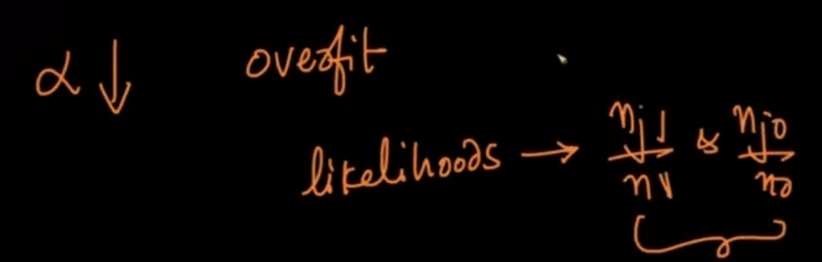

Hence, to summarize, we have a **hyper parameter alpha** using which we can **control the extent of overfitting or underfitting.**


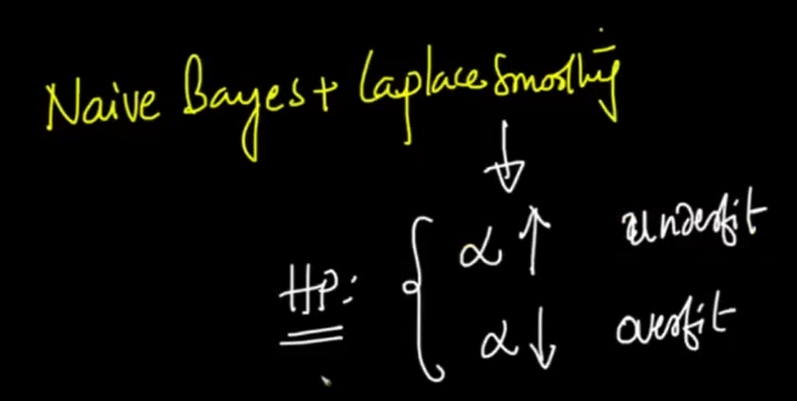

### Q. What if we had just ignored the new words' probabilities? [Timestamp @46:00]
Though this is a valid way to solve the problem we have, if we did this instead of Laplace smoothing, then we would not have any **hyperparameter** (i.e. $\alpha$ here) to play with.

Meaning that we would not be able to control the **bias-variance tradeoff**.

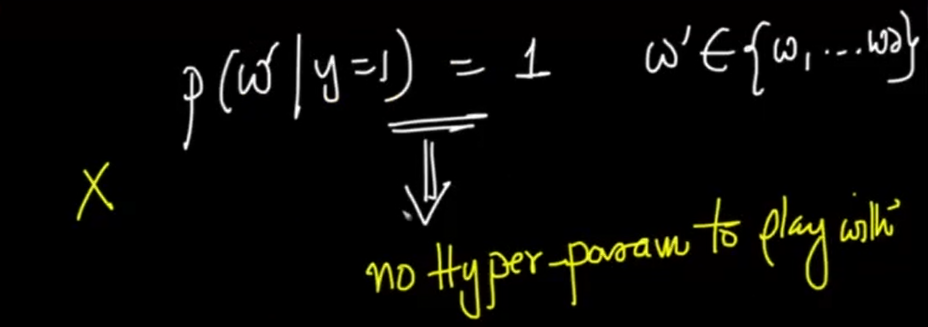

# Impact of imbalance [Timestamp @47:00]

### Q. How would we know if there is imbalance in our data?
We can tell if our data is imbalanced or not on the basis of our **class prior values**.

Consider a case where our class prior values are such that, <br>
$P(y=1)=0.7$ <br>
$P(y=0)=0.3$ <br>
This basically implies that there is imbalace in our data.

### Q. Should we re-balance the data?
**Yes.** It is good to rebalance.

- But it is **not mandatory** because these class prior values are taking care for some of them for us.
- The class prior values play a **negative role** also.
 - Consider a case where our class prior values are such that, <br>
$P(y=1)=0.7$ <br>
$P(y=0)=0.3$ <br>
 - Now even if our **product of likelihoods** for class 0 is greater (say 0.2) than that of class 1 (say 0.1), the net result we get, is that the value for <br>$P(y=1|text) = 0.7*0.1 = 0.07$ comes out to be greater than <br>$P(y=0|text) = 0.3*0.2 = 0.06$ value.
 - Just because there are more poitive points (class=1) in our data, we end up predicting the same.


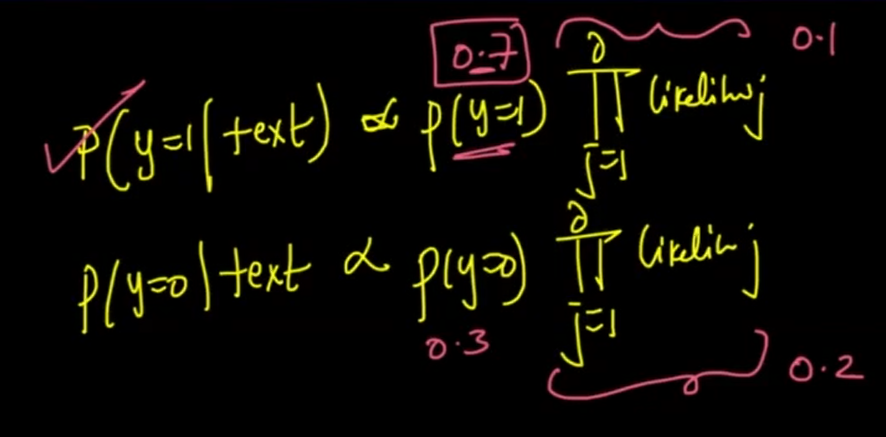


- So, these imbalanced data's class prior values are messing with what the likelihood values are indicating.

It's not that they are not important, but it is better to rebalance (by say, **upsampling the data** to remove imabalance) to avoid them playing such a **dominating role.**

If data is balanced, the class priors would get cancelled and our result of $P(y=1|text)$ and $P(y=0|text)$ would depend more on the **product of likelihoods**.


# Underflow problem [Timestamp @57:00]
So, as we have studied, here is the expression we have for the probability that a given text belongs to class 1

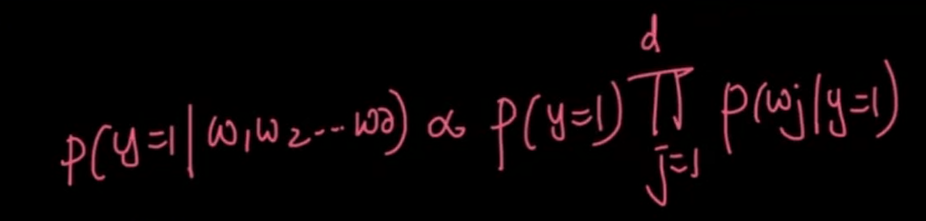

### Q. What is a potential computational problem with calculating this expression? [Let them answer]
- In this expression, we are essentially **multiplying multiple probability** values (that exist in the range 0<=Probability<=1)
- So what if the text that we are computing the probability for, what if it has **many words**?
- This means that value of **d increases.**
- As a result, we end up multiplying a large number (i.e. **d+1**) of very small values (probabilities) together, and this product naturally, becomes smaller and smaller.
- Hence after a point, it becomes **difficult to store** such small values in the **memory**.

This problem is called the **underflow problem**.

### Q. How to solve underflow problem?
- **Reduce d?**
 - No. We dont have the power of reducing the length of text beyond a certain extent.
 - Not practical approach.

- **Scaling?**
 - Potential solution.
 - A little complicated to implement here.
 - Is there a better alternative approach?

- How about we take **logarithm on both sides of our expression?**
 - This is the perfect solution, and will solve all of our problems.
 - Most implementations of Naive Bayes actually use this.
 - Our expression becomes: $log(P(y=1|w_1, w_2, ..., w_d)) = log(P(y=1)) + Σ_{j=1}^d log(P(w_j|y=1)) $
 - This also works because **addition is more computationally cheaper than multiplication.**

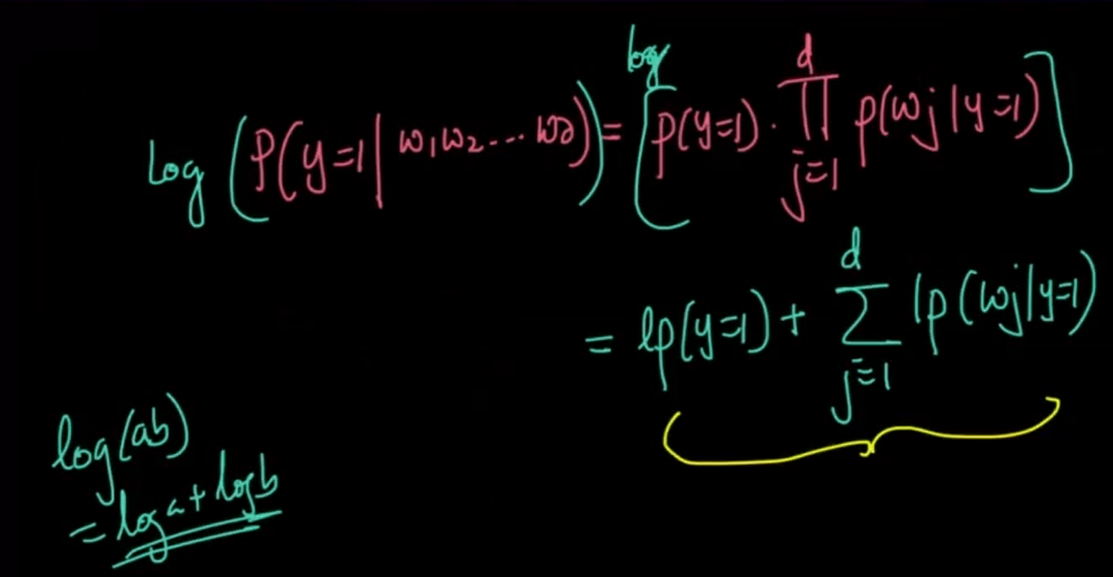

### Q. But log returns negative values also, isn't that a problem?
No.

log does return negative values, but it is a **monotonic funtion**, meaning that as x increases , log(x) increases.

So the negative values do not hurt us.

---
Note:
- The variation of Naive Bayes algorithm that we are using is **Bernoulli Naive Bayes** as discussed, because we are treating the word $w_j$ as a Bernoulli random variable.
- As a consequence of which, we get the value of C=2 in our Laplace smoothing.

# Feature Importance and Interpretability [Timestamp @1:10:000]

### Q. Is it even possible to get Feature Importance and Interpretability in Naive Bayes?
We have class priors and likelihoods for each class.

We can easily use the **likelihood** for feature importance, because that is what would be different for each text, whereas the class prior would be the same.

We can eaily say that if we are classifying a text as class 1, then we can just pick the **top likelihoods** (i.e. the highest probabilities here), because these values are the ones actually **impacting the model the most**.

It is these values that make us say that the given text belongs to class 1.

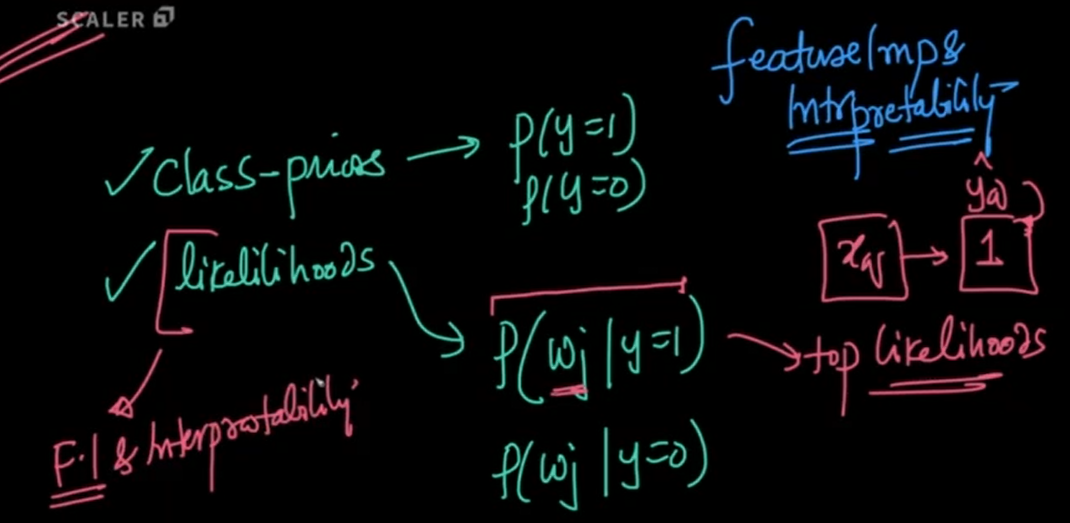

Suppose we have a query point, as given in the picture. We have given the word probabilities for each word below them.

Suppose if we have classified this text as class 1, then we can say that the word $w_6$ and $w_7$ are the ones that **impacted our decision the most**. The other words, not so much.

This means that $P(w_6|y=1)$ and $P(w_7|y=1)$ were the most important features among others!

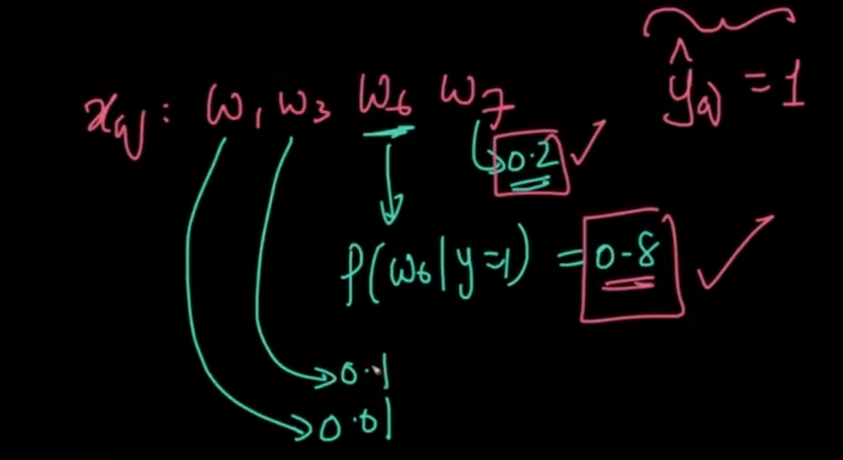

# Impact of outliers [Timestamp @1:13:15]

- At **Test time**:-
 - If we encounter a text that has a word, we have not seen before in our training data, then this text becomes an **outlier** of sorts.
 - But we need not worry about this, since this is taken care of by our **Laplace smoothing**

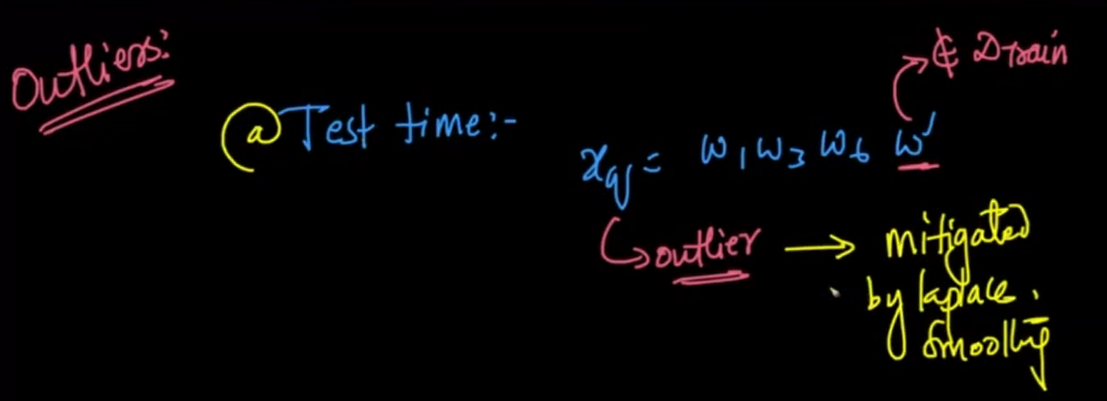

- At **Train time**:-
 - Imagine we have a word $w_j$.
 - We are computing the probability $P(w_j|y=1)$ or $P(w_j|y=0)$.
 - Suppose this word $w_j$ only occurs in 1 text, out of a total of a 1000 texts.
 - This means that word $w_j$ is a **rare word** or a **noise**, this is also sort of an outlier.
 - But again, this can also be solved to some extent using our Laplace smoothing with a slightly **larger alpha**.
 - **Not too large** (like 10,000), as we saw that can lead to **underfitting**, but maybe like say 10 or 100.

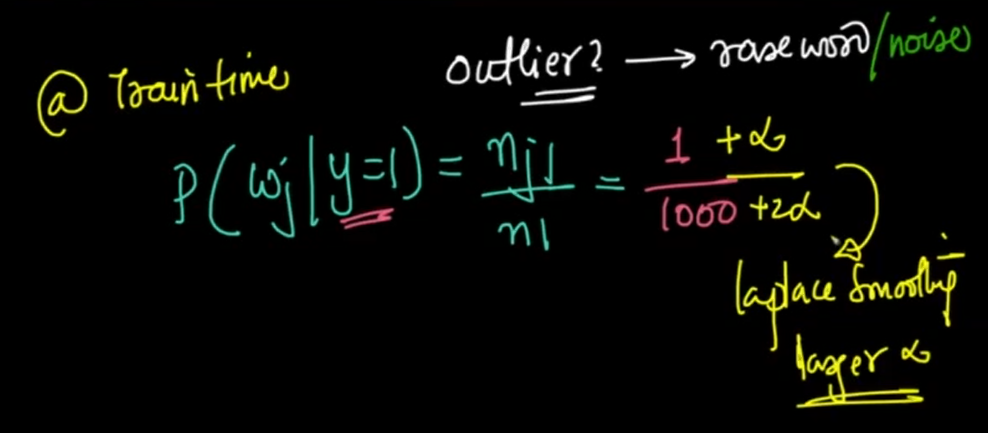


So, we see that the **interpretation of the outliers is different** during training and testing, but the **logic remains same**.

**Laplace smoothing** helps us deal with outliers in both these cases.

- There is one more **hack** that people apply to solve this outlier problem.
 - They check and see if the word $w_j$ occurs more than a **certain number of times**, (say 10), and only then they consider that word.
 - Otherwise, they choose to **ignore** it!


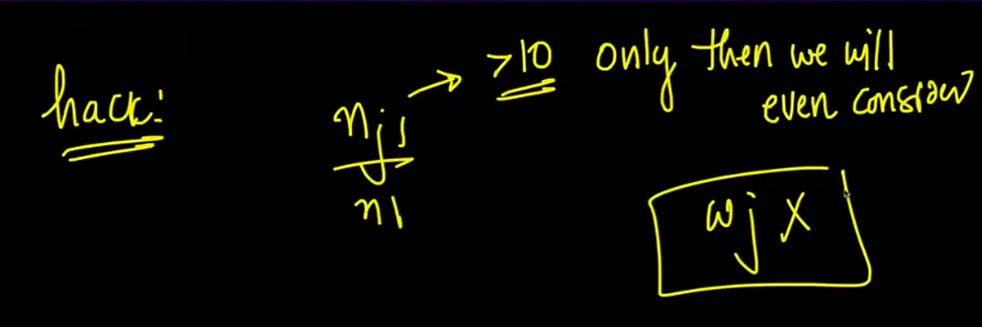

But instead of this approach, if we just increase our $\alpha$, the result would be the same.

Because, if a word occurs very few times, then instead of making $n_{j1} = 0$, just increase the alpha, so the alpha would anyway **neglect that effect** and problem is solved.

# Multinomial Naive Bayes [Timestamp @1:20:00]

### Q. What is Multinomial Naive Bayes? How is it different from our Bernoulli NB?

|Bernoulli NB |Multinomial NB|
|---|---|
|Features (words) are **Bernoulli random variables** and can only take 2 values 0 or 1|Here, features can take **multiple** values (more than 2)|
|The value of features is **discrete** (0 or 1) based on whether or not the given word is present in the text. | The value of features is a **count** of number of times the given word exists in the given text|
||It is an extension of the Bernoulli NB|
|Computationally **cheaper** and hence **faster**|Computationally **expensive** than Bernoulli NB, but still quite **fast**|
|Less accurate|More accurate|
|Here since value of feature $w_j$ can only be 0 or 1, the likelihood values are calculated as $P(w_j|y=1)$ and $P(w_j|y=0)$|Here since features (word $w_j$) can take multiple values, the likelihood values are calculated as $P(w_j = C|y=1)$ and $P(w_j = C|y=0)$ <br> where C is any of the multinomial value that feature $w_j$ can take.|
|Captures **less information**|Captures **more information**|


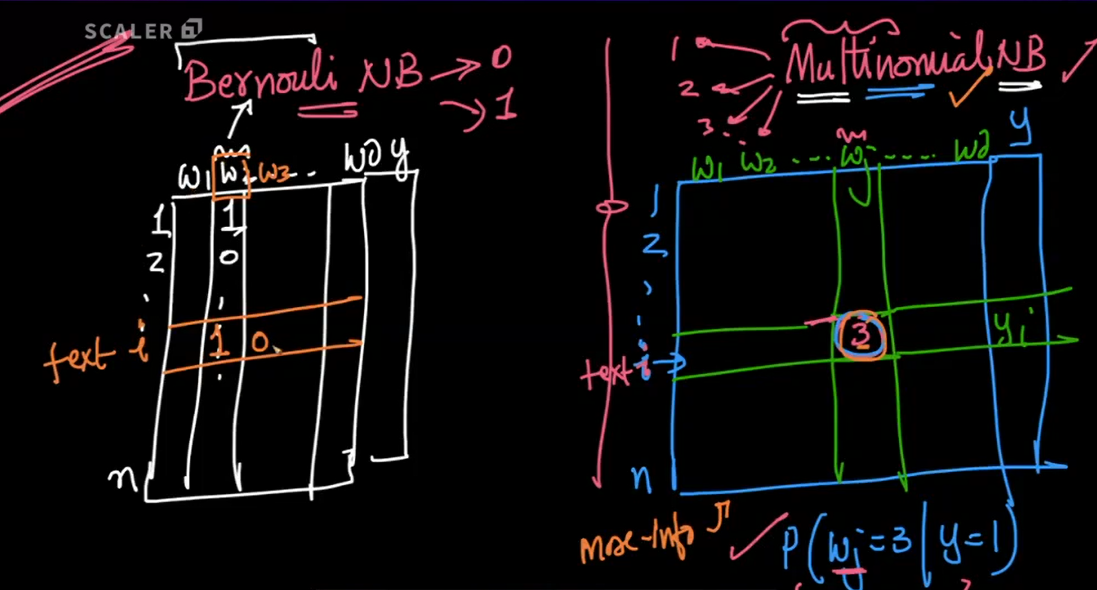

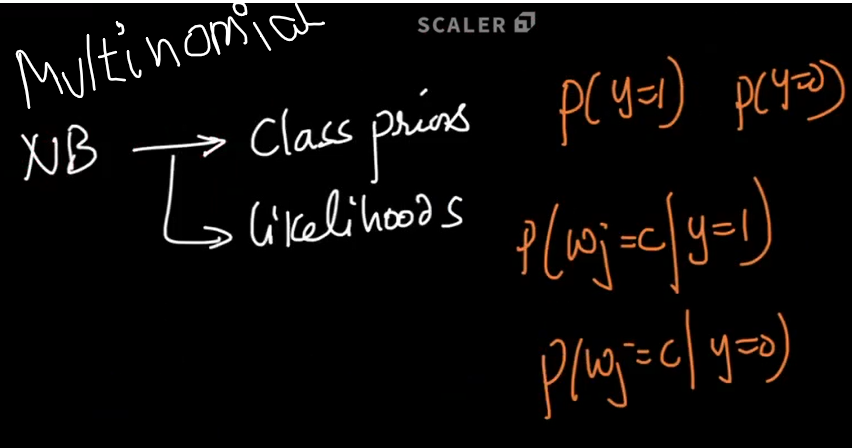